<a href="https://colab.research.google.com/github/Pushpalptha/Reviews-dection-and-image-change-from-color-to-black-and-white/blob/main/Reviews_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/news.zip')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[587,  51],
       [ 41, 588]])

In [ ]:
import pyqrcode
from pyqrcode import QRCode

# String which represent the QR code
s = "/content/drive/MyDrive/winzip27.exe"

# Generate QR code
url = pyqrcode.create(s)

# Create and save the png file naming "myqr.png"
url.svg("myyoutube.svg", scale = 8)

In [ ]:
!pip install pyqrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-py3-none-any.whl size=36241 sha256=f8537fcaf2a919134491b85ed4eff79e261771a0490eb337dfc8746f9c5547b0
  Stored in directory: /root/.cache/pip/wheels/34/2d/20/082874e49a32cdcc87ebaf99dd0099fb7774ef30f010dfb6f2
Successfully built pyqrcode


In [ ]:
import pandas as pd
import numpy as np

PROJECT

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/archive.csv")
print(data.head())

         product_id                                      product_title  \
0  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
0       5  Terrific purchase   
1       5  Terrific purchase   
2       5             Super!   
3       5             Super!   
4       5  Terrific purchase   

                                              review       location  \
0  1-more flexible2-bass is very high3-sound clar...        Shirala   
1     Super sound and good looking I like that prize  Visakhapatnam   
2  Very much satisfied with the device at this pr...      Kozhikode   
3  Nice headphone, bass was very good and sound i...          Jaora   
4  Soun

In [ ]:
print(data.isnull().sum())

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64


In [ ]:
#importing libraries
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data["review"] = data["review"].apply(clean)

In [ ]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

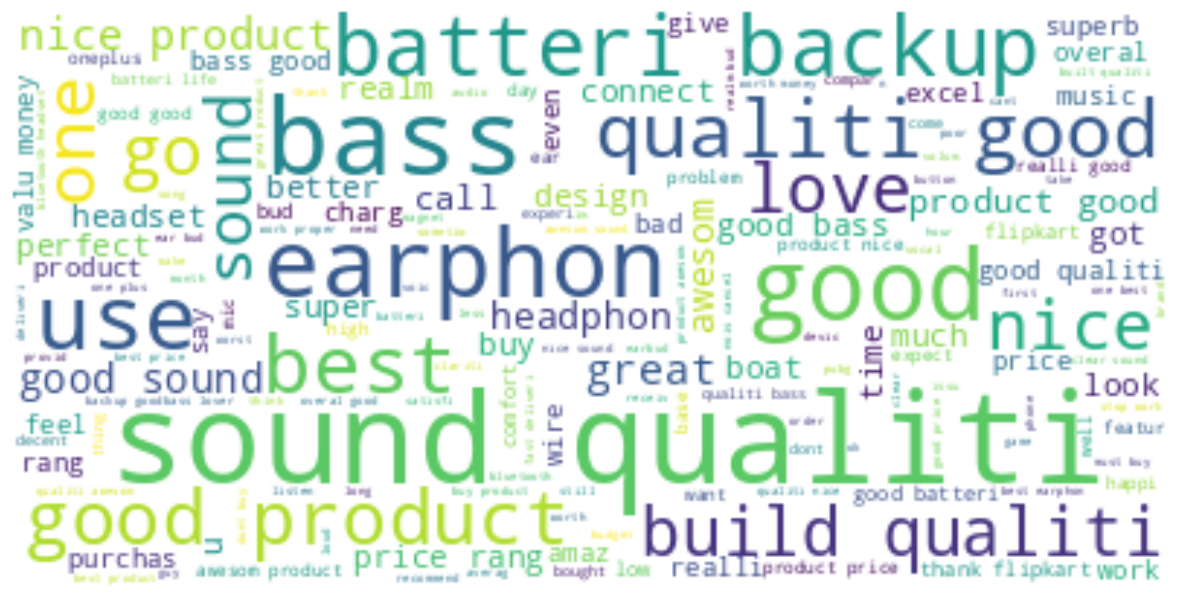

In [ ]:
#will use a word cloud to visualize the most used words in the reviews column
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0     clariti good  back   hour  thing fastest ch...     0.287     0.063   
1                   super sound good look like prize     0.863     0.000   
2  much satisfi devic price point awesom brand de...     0.223     0.071   
3  nice headphon bass good sound clear purchas ca...     0.394     0.057   
4  sound qualiti super batteri backup super quali...     0.634     0.000   

   Neutral  
0    0.650  
1    0.137  
2    0.707  
3    0.548  
4    0.366  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
#total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3779.763000000078
Negative:  518.0249999999994
Neutral:  5074.220999999948


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencv-python numpy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from argparse import ArgumentParser
parser = ArgumentParser()
# create and assign a dummy args
parser.add_argument('--myarg1')
args = parser.parse_args(['--myarg1', ''])

args.myarg2 = True  # actuals args assignment


In [ ]:
import numpy as np
import pandas as pd

img = cv2.imread("/content/drive/MyDrive/python-project-color-detection.zip")


In [ ]:
index = ["color", "color_name", "hex", "R", "G", "B"]
data = pd.read_csv("/content/drive/MyDrive/color.csv1", names=index, header=None)


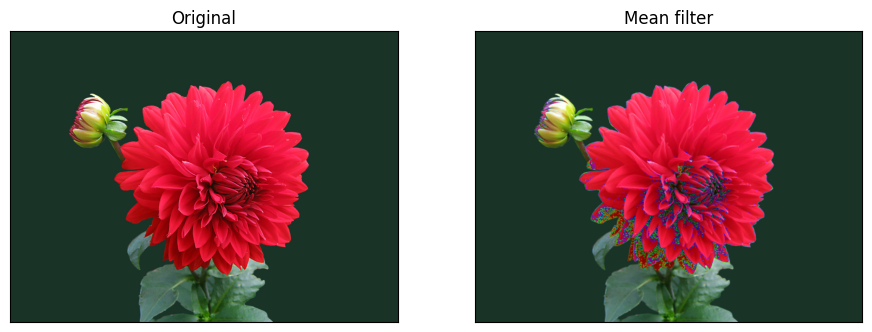

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('/content/pexels-pixabay-60597.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()


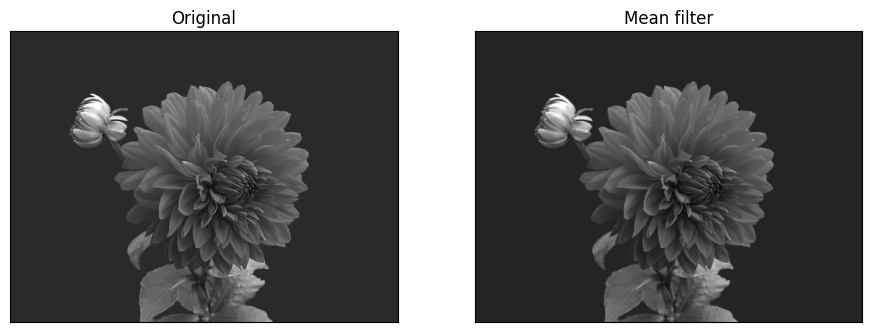

In [ ]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

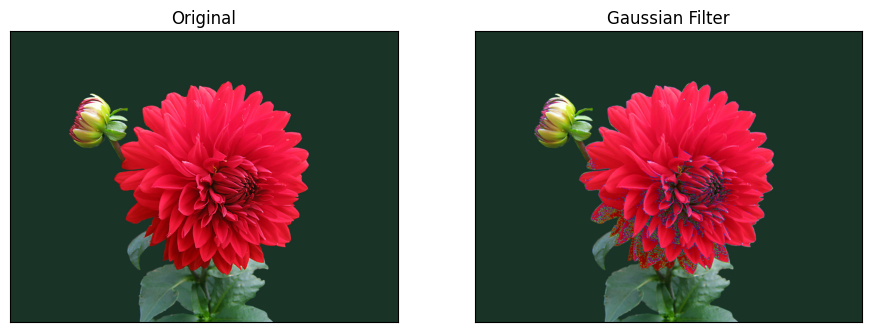

In [ ]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


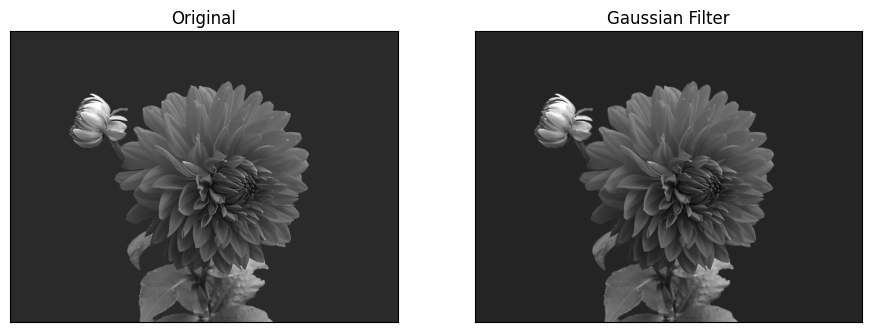

In [ ]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


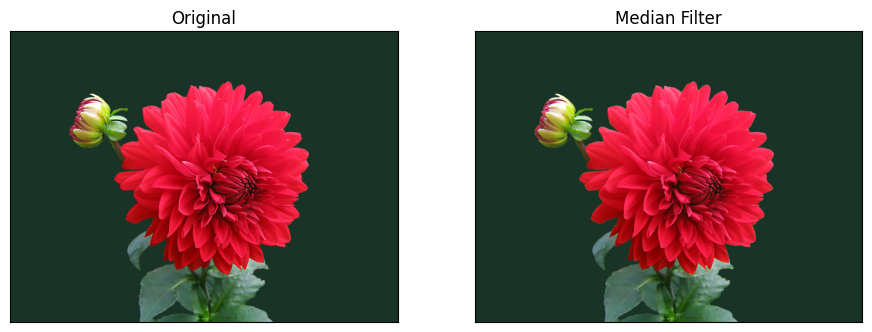

In [ ]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
def aman_effect(data, filter_size):
  temp = []
  indexer = filter_size // 2
  new_image = data.copy()
  nrow, ncol = data.shape
  for i in range(nrow):
    for j in range(ncol):
      for k in range(i-indexer, i+indexer+1):
        for m in range(j-indexer, j+indexer+1):
          if (k &gt; -1) and (k &lt; nrow):
            if (m &gt; -1) and (m &lt; ncol):
              temp.append(data[k,m])
      temp.remove(data[i,j])
      max_value = max(temp)
      min_value = min(temp)
      if data[i,j] &gt; max_value:
        new_image[i,j] = max_value
      elif data[i,j] &lt; min_value:
        new_image[i,j] = min_value
        temp =[]
    return new_image.copy()


SyntaxError: ignored

In [ ]:
new_image = aman_effect(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Image Filteration')
plt.xticks([]), plt.yticks([])
plt.show()


NameError: ignored

In [ ]:
import random
choices = ["Rock", "Paper", "Scissors"]
computer = random.choice(choices)
player = False
cpu_score = 0
player_score = 0
while True:
    player = input("Rock, Paper or  Scissors?").capitalize()
    ## Conditions of Rock,Paper and Scissors
    if player == computer:
        print("Tie!")
    elif player == "Rock":
        if computer == "Paper":
            print("You lose!", computer, "covers", player)
            cpu_score+=1
        else:
            print("You win!", player, "smashes", computer)
            player_score+=1
    elif player == "Paper":
        if computer == "Scissors":
            print("You lose!", computer, "cut", player)
            cpu_score+=1
        else:
            print("You win!", player, "covers", computer)
            player_score+=1
    elif player == "Scissors":
        if computer == "Rock":
            print("You lose...", computer, "smashes", player)
            cpu_score+=1
        else:
            print("You win!", player, "cut", computer)
            player_score+=1
    elif player=='End':
        print("Final Scores:")
        print(f"CPU:{cpu_score}")
        print(f"Plaer:{player_score}")
        break

You win! Rock smashes Scissors
You lose! Scissors cut Paper
Tie!
You lose! Scissors cut Paper
Tie!


In [ ]:
pip install python-telegram-bot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [ ]:
import telegram
telegram.Bot(token = '###############')


Bot()

In [ ]:
!pip install Filters

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
from telegram import Update
from telegram.ext import Updater
from telegram.ext import CommandHandler
from telegram.ext import MessageHandler